###### Reed Whitcraft
Mod 02 Final Project

## Mod 02 Project

# Preface

For this project, I will be looking at Northwind, a fictitious trading company, and its sales records with the hopes of finding strategies the company can employ to drive sales.  In hypothesis testing, the process follows this generic path:

    1. **Determination of Question** - You must know what you're looking for.
    
    2. **Statement of Null & Alternative Hypothesis** - The null hypothesis can thought of as the opposite of the working hypothesis.  It is hard (or maybe impossible) to conclusively confirm a hypothesis, but it is possible to conclusively negate one.  So, by setting the null hypothesis to the opposite, if I can find results that are statistically significant when testing, I can reject the null in favor of the alternative hypothesis.
    
    3. **Collection of Data** - Now that we have our question and hypothesis stated, we can gather our data.
    
    4. **Handle Data** - Many tests require normality of distributions and equal variances, so once we have our data, we will have to check for these.  If not normal, we can either conduct repeated random samples to normalize our data, or consider non-parametric tests that do not have these assumptions on distribution/variance.
    
    5. **Calculate Test Statistic** - Data is now ready, and we can test our null hypothesis
    
    6. **Review Results & Draw Conclusions** - Compare the test statistics, and compare with our significance level threhold, reject/accept our null hypothesis, and explain our results
    

Typically, when testing, one sets the confidence level to 95%, which results in an alpha value of 0.05.  So, in future comparisons, if we get p-values that are less than 0.05, we would consider this statistically significant, and allow us to reject the null hypothesis.

# Setup & Configuration
***

### Import Dependencies

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

# sql/database/orm libraries
import sqlalchemy
import sqlite3 as sql
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import inspect

# interactive notebook library
from ipywidgets import interact, interactive

# plotting/visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Establish Database Connection & Preview Tables

In [2]:
# Open a connection to the sql server.
# using sqlite3 to initially get data into dataframes quickly
connect = sql.connect('Northwind_small.sqlite')
c = connect.cursor()
# Get table names
raw = c.execute("""select name from sqlite_master where type = 'table'""").fetchall()
tables = []
for table in raw:
    tables.append(table[0])

In [3]:
@interact

# query tables from above, and load them into a hash to view head/description/shape/etc
def table_preview(Table = tables, Preview = ['Head','Description', 'Shape','Unique','Types']):
    statement = "SELECT * FROM [" + Table + "]"
    print(statement)
    df = pd.read_sql_query(statement, connect)
    preview_return = {'Head':df.head(10), 'Description':df.describe(), 
                      'Shape':df.shape, 'Unique':df.nunique(axis = 0), 'Types':df.dtypes}
    out = preview_return[Preview]
    return out

interactive(children=(Dropdown(description='Table', options=('Employee', 'Category', 'Customer', 'Shipper', 'S…

In [4]:
# connecting to database
engine = create_engine("sqlite:///Northwind_small.sqlite", echo=True)
Session = sessionmaker(bind=engine)
session = Session()
inspector = inspect(engine)
print(inspector.get_table_names()) # print table names

2019-04-08 11:16:02,431 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-08 11:16:02,432 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,432 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-08 11:16:02,433 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,434 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-08 11:16:02,435 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory', 'sqlite_sequence']


In [5]:
# import sqalchemy, an ORM, and their query API for accessing database
from sqlalchemy import *
from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base
# from sqlalchemy.orm import relationship
from sqlalchemy.sql import func

# initial setup to later map table names to objects & columns to attributes
##### START boilerplate
metadata = MetaData()
metadata.reflect(engine)
Base = automap_base(metadata=metadata)

Base.prepare(engine, reflect=True)
##### START boilerplate

2019-04-08 11:16:02,447 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-08 11:16:02,448 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,450 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-04-08 11:16:02,451 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,452 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-04-08 11:16:02,453 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,454 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Category")
2019-04-08 11:16:02,455 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,455 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-04-08 11:16:02,456 INFO sqlalchemy.engine.base.Engin

2019-04-08 11:16:02,521 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("EmployeeTerritory")
2019-04-08 11:16:02,522 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,522 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'EmployeeTerritory' AND type = 'table'
2019-04-08 11:16:02,523 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,524 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-04-08 11:16:02,525 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,525 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-04-08 11:16:02,526 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,526 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("sqlite_autoindex_EmployeeTerritory_1")
2019-04-08 11:16:02,527 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,528 INFO sqlalchemy.engine.base.Engine SELECT sql 

2019-04-08 11:16:02,594 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Supplier")
2019-04-08 11:16:02,594 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,596 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-04-08 11:16:02,597 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,598 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Supplier")
2019-04-08 11:16:02,598 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,599 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-04-08 11:16:02,600 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,601 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Supplier")
2019-04-08 11:16:02,602 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,603 INFO 

2019-04-08 11:16:02,663 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,664 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("CustomerCustomerDemo")
2019-04-08 11:16:02,665 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,667 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("CustomerCustomerDemo")
2019-04-08 11:16:02,667 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,668 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("sqlite_autoindex_CustomerCustomerDemo_1")
2019-04-08 11:16:02,669 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,670 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'CustomerCustomerDemo' AND type = 'table'
2019-04-08 11:16:02,670 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,671 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("CustomerDemographic")
2019-04-08 11:16:02,671 INFO sqlalchemy.engine.base.Engine ()


2019-04-08 11:16:02,733 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,734 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Product")
2019-04-08 11:16:02,734 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,736 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Product' AND type = 'table'
2019-04-08 11:16:02,736 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,738 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Product")
2019-04-08 11:16:02,738 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,739 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Product' AND type = 'table'
2019-04-08 11:16:02,740 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,741 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Product")
2019-04-08 11:16:02,741 INFO sqlal

2019-04-08 11:16:02,793 INFO sqlalchemy.engine.base.Engine ()
2019-04-08 11:16:02,793 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'sqlite_sequence' AND type = 'table'
2019-04-08 11:16:02,794 INFO sqlalchemy.engine.base.Engine ()


In [6]:
# Mapping to classes
Employee, Customer = Base.classes.Employee, Base.classes.Customer
Product, Category = Base.classes.Product, Base.classes.Category
Order, OrderDetail = Base.classes.Order, Base.classes.OrderDetail
Shipper, Supplier = Base.classes.Shipper, Base.classes.Supplier

### Helper Methods

In [7]:
# helper methods :)

###
### SAMPLING HELPER METHODS
###

# create sample of sample_size from data
def create_sample(data, sample_size):
    sample = []
    while len(sample) != sample_size:
        x = np.random.choice(data)
        sample.append(x)
    return sample

def get_sample_mean(sample):
    return sum(sample) / len(sample)

# create sample distribution from data, using above two functions

def create_sample_distribution(data, dist_size=100, sample_size=30):
    sample_distribution = []
    n = 0
    while len(sample_distribution) != dist_size:
        np.random.seed(n)
        n+=1
        sample = create_sample(data, sample_size)
        sample_mean = get_sample_mean(sample)
        sample_distribution.append(sample_mean)
        
    return sample_distribution
    

def effect_size_blurb(effect_size):
    e_size = ""
    if effect_size <= 0.20:
        e_size = "small"
    elif effect_size >0.20 and effect_size <=0.50:
        e_size = "small/medium"
    elif effect_size > 0.50 and effect_size <=0.80:
        e_size = "medium/large"
    elif effect_size > 0.80 and effect_size <=1.20:
        e_size = "large/very large"
    else:
        e_size = "huge" 
        
    init = "Effect size is a measurement of the strength of a relationship between two variables on a numeric scale, and Cohen's d calculates this as the difference between two means divided by a standard deviation for the combined data. "
    init2 = "Generally, 0.01 is considered very small, 0.20 small, 0.50 medium, 0.80 large, 1.20 very large, and 2.0 huge. "
    init3 = "Typically, a lower Cohen's d score indicates the need for larger sample sizes. "
    init4 = "With a cohen's d value of " + str(round(effect_size, 3)) + ", we can say that the effect size is " + e_size
    
    return init + init2 + init3 + init4

# Hypothesis Tests
***

## Question 01: Do Discounts Increase The Overall Order Size?

Economically, there is a negative relationship between price and demand - as price goes up, demand falls, and as price goes down, demand rises.  For this case study, I will look to see if the presence of discounts (decrease in price) increases the overall order size (quantity demanded) by comparing the average total quantities ordered in two groups - (1) Orders that have at least one item discounted (Discounted), and (2) Orders that contain no discounted items (Undiscounted).

### Hypothesis Statement

#### Null Hypothesis

>**Ho:** Discounted Mean Quantity Ordered = Undiscounted Mean Quantity Ordered

#### Alternate Hypothesis

>**Ha:** Discounted Mean Quantity Ordered > Undiscounted Mean Quantity Ordered

First, we have to query our database - aggregating the OrderDetails (line items) for each Order, and separating discounted and undiscounted orders.

### Query database for orders with and without any discounted items

In [8]:
# query OrderDetail => grouped (aggregated) by Order (Orders have many OrderDetails)
# sum quantities across OrderDetail that belong to same Order
# find MaxDiscount that belong to same Order (to determine non-discounted orders, which will = 0)
subquery = session.query(OrderDetail, 
                         func.sum(OrderDetail.Quantity).label("TotalQuantity"), 
                         func.max(OrderDetail.Discount).label("MaxDiscount"), 
                         func.min(OrderDetail.Discount).label("MinDiscount")
                        ).group_by(OrderDetail.OrderId).subquery()

query = session.query(subquery).filter(subquery.c.MaxDiscount > 0).group_by(subquery.c.OrderId)
discounted_orders = pd.read_sql(query.statement, engine) # 380 total

# same as query above, *EXCEPT* filtering for MaxDiscount == 0
# this way, we have orders that have no items with discounts
subquery2 = session.query(OrderDetail, 
                         func.sum(OrderDetail.Quantity).label("TotalQuantity"), 
                         func.max(OrderDetail.Discount).label("MaxDiscount"), 
                         func.min(OrderDetail.Discount).label("MinDiscount")
                        ).group_by(OrderDetail.OrderId).subquery()

query2 = session.query(subquery2).filter(subquery2.c.MaxDiscount == 0).group_by(subquery2.c.OrderId)
undiscounted_orders = pd.read_sql(query2.statement, engine) # 450 total

2019-04-08 11:16:05,259 INFO sqlalchemy.engine.base.Engine SELECT anon_1."Id", anon_1."OrderId", anon_1."ProductId", anon_1."UnitPrice", anon_1."Quantity", anon_1."Discount", anon_1."CustomerId", anon_1."TotalQuantity", anon_1."MaxDiscount", anon_1."MinDiscount" 
FROM (SELECT "OrderDetail"."Id" AS "Id", "OrderDetail"."OrderId" AS "OrderId", "OrderDetail"."ProductId" AS "ProductId", "OrderDetail"."UnitPrice" AS "UnitPrice", "OrderDetail"."Quantity" AS "Quantity", "OrderDetail"."Discount" AS "Discount", "OrderDetail"."CustomerId" AS "CustomerId", sum("OrderDetail"."Quantity") AS "TotalQuantity", max("OrderDetail"."Discount") AS "MaxDiscount", min("OrderDetail"."Discount") AS "MinDiscount" 
FROM "OrderDetail" GROUP BY "OrderDetail"."OrderId") AS anon_1 
WHERE anon_1."MaxDiscount" > ? GROUP BY anon_1."OrderId"
2019-04-08 11:16:05,260 INFO sqlalchemy.engine.base.Engine (0,)
2019-04-08 11:16:05,272 INFO sqlalchemy.engine.base.Engine SELECT anon_1."Id", anon_1."OrderId", anon_1."ProductId", a

/anaconda3/lib/python3.7/site-packages/sqlalchemy/sql/sqltypes.py:603: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


### Normality and Variance Checks of Both Samples

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


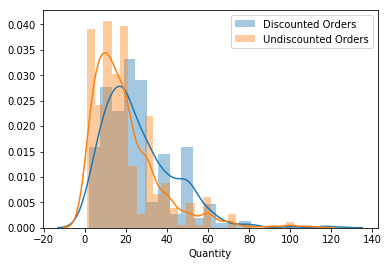

In [9]:
# Take a look at the distributions of these orders' quantities
sns.distplot(discounted_orders.Quantity, label="Discounted Orders")
sns.distplot(undiscounted_orders.Quantity, label="Undiscounted Orders")
plt.legend()

#### Confirming Non-Normality of Distributions

#### Variance Check of Both Samples

Here, we'll use the Shapiro-Wilk normality test, which tests if a random sample comes from a normal distribution.

>Ho: Sample data is normally distributed

>Ha: Sample data is not normally distributed

Here, if we get a p-value less than 0.05, we have to reject our null hypothesis that the data is normally distributed, and accept that the data is not from a normal distribution.  Ideally, we want the null hypothesis to not be rejected (but, correctly!), but that rarely happens with real data and large samples.  If the null hypothesis is rejectable, then we'll have to consider repeated sampling, normalization (log), or accepting the distribution given that our sample sizes are large enough.

In [10]:
shapiro_discounted = stats.shapiro(discounted_orders.Quantity)
shapiro_undiscounted = stats.shapiro(undiscounted_orders.Quantity)

# p-value for discounted orders distribution test
print("p-value for discounted orders: ", shapiro_discounted[1]) 

# p-value for undiscounted orders distribution test
print("p-value for undiscounted orders: ", shapiro_undiscounted[1])

print('t-stat for discounted orders: ', shapiro_discounted[0])
print('t-stat for undiscounted orders: ', shapiro_undiscounted[0])
# p-value (discounted) => reject null hypothesis => not normally distributed sample
# p-value (undiscounted) => reject null hypothesis => not normally distributed sample

p-value for discounted orders:  1.4756438800923866e-14
p-value for undiscounted orders:  2.308488827657349e-21
t-stat for discounted orders:  0.9065327048301697
t-stat for undiscounted orders:  0.8325416445732117


Now, we have to check if the variances of these samples are the same, and we will do this by applying the Levene test through scipy's **stats.levene()** method. 

> Ho: Sample variances are the same (and come from populations with equal variances)

> Ha: Sample variances are not the same

Ideally, again, we want the null hypothesis to not be rejected.

In [11]:
stats.levene(discounted_orders.Quantity, undiscounted_orders.Quantity)
# p-value of 0.0962, above our threshold of 0.05, so *accept* null hypothesis that variances are similar
# and conclude that the sample variances are not from populations with equal variances

LeveneResult(statistic=2.7726510597324077, pvalue=0.0962655288672859)

### T-Test Both Samples & Analysis

In [12]:
# helper method to measure effect size
# represents the magnitude of differences between two groups on a given variable
# with larger values representing a greater differentation between two groups on that variable

def pooled_var(group1, group2, col_name=None):
    n1, n2 = len(group1), len(group2)
    if col_name == None:
        var1 = group1.var()
        var2 = group2.var()
    else:
        var1 = group1[col_name].var()
        var2 = group2[col_name].var()
        
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    return pooled_var

# for calculating effect size
def cohens_d(group1, group2, col_name=None):
    if col_name == None:
        diff = group1.mean() - group2.mean()
    else:
        diff = group1[col_name].mean() - group2[col_name].mean()
    
    # calculate pooled threshold
    pooled_v = pooled_var(group1, group2, col_name)
    
    # calculate cohen's d statistic
    d = diff / np.sqrt(pooled_v)
    
    return d

In [13]:
from statsmodels.stats.weightstats import ttest_ind
# import scipy.stats

tstat, pvalue, df = ttest_ind(discounted_orders.Quantity, undiscounted_orders.Quantity, alternative='larger')

# calculate pooled variance
pooled_v = pooled_var(undiscounted_orders, discounted_orders, "Quantity")
# calculate effect size using cohen's d
cohen_d = cohens_d(undiscounted_orders, discounted_orders, "Quantity")

print('p-value = {0:1.3e}'.format(pvalue))
print('t-stat = {0:1.3f}'.format(tstat))
print('cohen d = {0:1.3f}'.format(cohen_d))

e = effect_size_blurb(cohen_d)

p-value = 1.028e-07
t-stat = 5.238
cohen d = -0.365


Given the p-value of {{pvalue}}, which is < our set significance level of 0.05, and the t-statistic of {{tstat}}, we can confidently reject the null hypothesis in favor of our alternative hypothesis.  That is, we can say that the average quantity order of discounted orders and undiscounted orders are not the same, and discounted orders have a higher average quantity of items.  

{{e}}


## Question 01B: Do Discount Rates Have Different Effects On Demand? Are Higher Discounts More Effective In Increasing Quantity Demanded Than Lower Discounts?

Same scenario as before - a decrease in price, typically, results in an increase in demand.  In theory, a greater decrease in price should result in a greater increase in quantity demanded. Let's take a look at the types of discounts that have been offered.

### Query Database

#### Inspect Discount Rates and Frequency

In [14]:
# query OrderDetail table for Discount & count the appearances of Discount
subquery = session.query(OrderDetail.Discount,
                      func.count(OrderDetail.Discount).label("DiscountCount")
                     ).group_by(OrderDetail.Discount).subquery()

query = session.query(subquery
                     ).order_by(subquery.c.DiscountCount.desc())

discount_counts = pd.read_sql(query.statement, engine)
print("Total Number of OrderDetails:", discount_counts.DiscountCount.sum())
discount_counts.head(11)

2019-04-08 11:16:09,420 INFO sqlalchemy.engine.base.Engine SELECT anon_1."Discount", anon_1."DiscountCount" 
FROM (SELECT "OrderDetail"."Discount" AS "Discount", count("OrderDetail"."Discount") AS "DiscountCount" 
FROM "OrderDetail" GROUP BY "OrderDetail"."Discount") AS anon_1 ORDER BY anon_1."DiscountCount" DESC
2019-04-08 11:16:09,420 INFO sqlalchemy.engine.base.Engine ()
Total Number of OrderDetails: 2155


,Discount,DiscountCount
0,0.00,1317
1,0.05,185
2,0.10,173
3,0.20,161
4,0.15,157
5,0.25,154
6,0.03,3
7,0.02,2
8,0.01,1
9,0.04,1


<table>
    <thead>
        <tr>
            <th colspan="3" style="text-align: center">Out of the 2,155 OrderDetails</th>
        </tr>
        <tr>
            <th># Of OrderDetails</th>
            <th>Discount</th>
            <th>% Of All OrderDetails</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: center">1,317</td>
            <td style="text-align: center">0%</td>
            <td style="text-align: center">61.1%</td>
        </tr>
        <tr>
            <td style="text-align: center">185</td>
            <td style="text-align: center">5%</td>
            <td style="text-align: center">8.5%</td>
        </tr>
        <tr>
            <td style="text-align: center">173</td>
            <td style="text-align: center">10%</td>
            <td style="text-align: center">8.0%</td>
        </tr>
        <tr>
            <td style="text-align: center">161</td>
            <td style="text-align: center">20%</td>
            <td style="text-align: center">7.5%</td>
        </tr>
        <tr>
            <td style="text-align: center">157</td>
            <td style="text-align: center">15%</td>
            <td style="text-align: center">7.3%</td>
        </tr>
        <tr>
            <td style="text-align: center">154</td>
            <td style="text-align: center">25%</td>
            <td style="text-align: center">7.1%</td>
        </tr>
    </tbody>
</table>

#### Query Function To Get Orders By Discount

Now that we know what kind of discount rates have been offered and their frequency, we have a better idea of what we want to query.  Here, we'll write a function that takes a discount rate as its input, queries the OrderDetail table, and aggregates quantities ordered for the given discount rate per order:

In [15]:
# takes Discount (fraction) as input and returns TotalQuantity
# from OrderDetails that have the chosen Discount
def query_orders_by_discount(discount):
    query = session.query(OrderDetail.OrderId, 
                            func.sum(OrderDetail.Quantity).label("TotalQuantity")
                            ).filter(OrderDetail.Discount == discount).group_by(OrderDetail.OrderId)
    orders = pd.read_sql(query.statement, engine)
    return orders

In [16]:
discount_0 = query_orders_by_discount(0) # full-price
discount_5 = query_orders_by_discount(0.05)
discount_10 = query_orders_by_discount(0.10)
discount_15 = query_orders_by_discount(0.15)
discount_20 = query_orders_by_discount(0.20)
discount_25 = query_orders_by_discount(0.25)

2019-04-08 11:16:10,378 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."OrderId", sum("OrderDetail"."Quantity") AS "TotalQuantity" 
FROM "OrderDetail" 
WHERE "OrderDetail"."Discount" = ? GROUP BY "OrderDetail"."OrderId"
2019-04-08 11:16:10,379 INFO sqlalchemy.engine.base.Engine (0,)
2019-04-08 11:16:10,385 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."OrderId", sum("OrderDetail"."Quantity") AS "TotalQuantity" 
FROM "OrderDetail" 
WHERE "OrderDetail"."Discount" = ? GROUP BY "OrderDetail"."OrderId"
2019-04-08 11:16:10,386 INFO sqlalchemy.engine.base.Engine (0.05,)
2019-04-08 11:16:10,390 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."OrderId", sum("OrderDetail"."Quantity") AS "TotalQuantity" 
FROM "OrderDetail" 
WHERE "OrderDetail"."Discount" = ? GROUP BY "OrderDetail"."OrderId"
2019-04-08 11:16:10,391 INFO sqlalchemy.engine.base.Engine (0.1,)
2019-04-08 11:16:10,395 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."OrderId", sum("OrderDetail"."Quanti

In [17]:
# interactive to preview what the queries returned.
preview_select = ["0%", "5%", "10%", "15%", "20%", "25%"]
preview_hash = {"0%": discount_0, "5%": discount_5, "10%": discount_10, "15%": discount_15, "20%": discount_20, "25%": discount_25}
@interact
def table_preview(Table = preview_select, Preview = ['Head','Description']):
    df = preview_hash[Table]
    preview_return = {'Head':df.head(10), 'Description':df.describe()}
    out = preview_return[Preview]
    return out

interactive(children=(Dropdown(description='Table', options=('0%', '5%', '10%', '15%', '20%', '25%'), value='0…

### Normality & Variance Checks

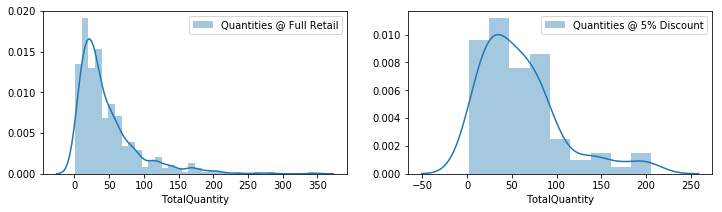

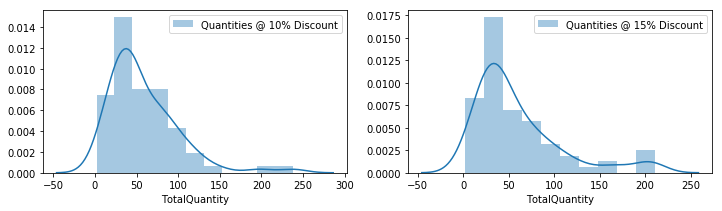

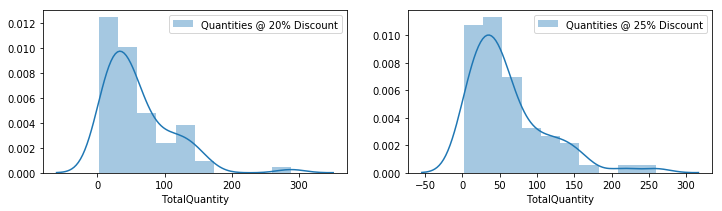

In [18]:
# Take a look at the distributions of quantities ordered at given discount rates
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3))
p = sns.distplot(discount_0.TotalQuantity, label="Quantities @ Full Retail", ax=ax1)
p.legend()
p = sns.distplot(discount_5.TotalQuantity, label="Quantities @ 5% Discount", ax=ax2)
p.legend()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3))
p = sns.distplot(discount_10.TotalQuantity, label="Quantities @ 10% Discount", ax=ax1)
p.legend()
p = sns.distplot(discount_15.TotalQuantity, label="Quantities @ 15% Discount", ax=ax2)
p.legend()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3))
p = sns.distplot(discount_20.TotalQuantity, label="Quantities @ 20% Discount", ax=ax1)
p.legend()
p = sns.distplot(discount_25.TotalQuantity, label="Quantities @ 25% Discount", ax=ax2)
p.legend()

#### Confirming Non-Normality of Distributions

Here, we'll use the Shapiro-Wilk normality test, which tests if a random sample comes from a normal distribution.

>Ho: Sample data is normally distributed

>Ha: Sample data is not normally distributed

In [19]:
discounts_list = [discount_0, discount_5, discount_10, discount_15, discount_20, discount_25]
for discount in discounts_list:
    shapiro_stat = stats.shapiro(discount)
    print("p-value for normality: ", shapiro_stat[1])
    print("t-stat for normality: ", shapiro_stat[0])
    print("*_*_*_*_*")

p-value for normality:  5.044674471569341e-44
t-stat for normality:  0.6599211692810059
*_*_*_*_*
p-value for normality:  1.6800632777017265e-18
t-stat for normality:  0.659333348274231
*_*_*_*_*
p-value for normality:  3.6745625975761434e-17
t-stat for normality:  0.6594877243041992
*_*_*_*_*
p-value for normality:  3.798118234800944e-17
t-stat for normality:  0.6600745916366577
*_*_*_*_*
p-value for normality:  6.551650292757264e-17
t-stat for normality:  0.6601555943489075
*_*_*_*_*
p-value for normality:  8.058693297745585e-17
t-stat for normality:  0.6589568853378296
*_*_*_*_*


Very low p-values across the board for all ranges of discounts, so we have to reject our null hypothesis that these samples are normally distributed.

### T-Test Both Samples & Analysis

With non-normally distributed samples, we are going to use the Welch's t-test again, assuming unequal variances between the discount samples

In [20]:
@interact
# creates a dropdown to compare discount rates via Welch's t-test
# Given that we have set the "alternative"="larger" as a parameter to ttest_ind()
# this means Discount1 = "Greater Discount % 
# AKA The mean that the Alternative Hypothesis says is higher
# Discount2 = Lower Discount or Undiscounted Orders
def table_preview(Discount1 = ['25%', '20%', '15%', '10%', '5%', '0%'], Discount2 = ['5%','10%','15%', '20%', '25%', '0%']):
    
    discount_dict = {
        '0%': discount_0,
        '5%': discount_5, 
        '10%':discount_10, 
        '15%':discount_15, 
        '20%': discount_20, 
        '25%': discount_25
    }
    selected_discount_1 = discount_dict[Discount1] # defaults to first in list
    selected_discount_2 = discount_dict[Discount2] # defaults to first in list
    
    tstat, pvalue, df = ttest_ind(selected_discount_1.TotalQuantity, selected_discount_2.TotalQuantity, usevar='unequal', alternative='larger')
    
    # calculate pooled variance
    pooled_v = pooled_var(selected_discount_1, selected_discount_2, "TotalQuantity")
    
    # calculate effect size using cohen's d
    cohen_d = cohens_d(selected_discount_1, selected_discount_2, "TotalQuantity")
    
    print("Comparing {} Discount vs. {} Discount, we get the following:".format(Discount1, Discount2))
    print('p-value = {0:1.3e} \n hey'.format(pvalue))
    print('t-stat = {0:1.3f}'.format(tstat))
    print('cohen d = {0:1.3f}'.format(cohen_d))

interactive(children=(Dropdown(description='Discount1', options=('25%', '20%', '15%', '10%', '5%', '0%'), valu…

<table>
    <thead>
        <tr>
            <th>Comparison</th>
            <th>P-Value</th>
            <th>T-Stat</th>
            <th>Cohen's d</th>
            <th>Accept/Reject Null</th>
            <th>Effect Size</th>
            <th>Conclusion</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>25% vs. Full Retail</td>
            <td>1.655e-02 </td>
            <td>2.167</td>
            <td>0.306</td>
            <td>Reject Null</td>
            <td>Small</td>
            <td>P value below 0.05, but above; high t-stat</td>
        </tr>
        <tr>
            <td>20% vs. Full Retail</td>
            <td>1.876e-02 </td>
            <td>2.113</td>
            <td>0.290</td>
            <td>Reject Null</td>
            <td>Small</td>
            <td>P value below 0.05; high t-stat</td>
        </tr>
        <tr>
            <td>15% vs. Full Retail</td>
            <td>1.740e-02 </td>
            <td>2.143</td>
            <td>0.286</td>
            <td>Reject Null</td>
            <td>Small/Med</td>
            <td>P value well below 0.05; high t-stat</td>
        </tr>
        <tr>
            <td>10% vs. Full Retail</td>
            <td>1.373e-02 </td>
            <td>2.239</td>
            <td>0.264</td>
            <td>Reject Null</td>
            <td>Small</td>
            <td>P value well below 0.05; high t-stat</td>
        </tr>
        <tr>
            <td>5% vs. Full Retail</td>
            <td>7.153e-03 </td>
            <td>2.489</td>
            <td>0.292</td>
            <td>Reject Null</td>
            <td>Small</td>
            <td>P value well below 0.05; high t-stat</td>
        </tr>
        <tr>
            <td colspan="7" style='text-align: center'>Comparison of Discounts vs. 5% Discount</td>
        </tr>
        <tr>
            <td>25% vs. 5%</td>
            <td>4.572e-01</td>
            <td>0.108</td>
            <td>0.017</td>
            <td>Accept Null</td>
            <td>Very Small</td>
            <td>High P value; low t-stat</td>
        </tr>
        <tr>
            <td>20% vs. 5%</td>
            <td>4.979e-01 </td>
            <td>0.005</td>
            <td>0.001</td>
            <td>Accept Null</td>
            <td>Very Small</td>
            <td>High P value; very low t-stat</td>
        </tr>
        <tr>
            <td>15% vs. 5%</td>
            <td>5.080e-01</td>
            <td>-0.020</td>
            <td>-0.003</td>
            <td>Accept Null</td>
            <td>Very Small</td>
            <td>High P value; very low t-stat</td>
        </tr>
        <tr>
            <td>10% vs. 5%</td>
            <td>5.777e-01 </td>
            <td>-0.196</td>
            <td>-0.031</td>
            <td>Accept Null</td>
            <td>Very Small</td>
            <td>High P value; very low t-stat</td>
        </tr>
    </tbody>
</table>

Looking at the above table, we can conclude that quantities ordered with discounts of 20%, 15%, 10%, and 5% are greater than the quantities ordered at full retail price.  Additionally, we can see that at discount rates of 15%, 10%, and 5%, we have the lowest p-values and highest t-stats.  Discount rates of 15% and 10% have a small-medium effect size while the other discount rates have smaller effect sizes.  

This isn't surprising - at all discount rates (excluding 25%), we see an increase in total quantities ordered compared to full-retail-priced orders.  

My initial takeaway is that, potentially, the higher discount rates at 25% and 20% are an indication of product liquidation.  That is, given that we are dealing with food products, with a discount that high, it could be the case that the company was trying to get rid of extra inventory (or products that are expiring soon and will have 0 value if not sold).

Additionally, with the success of 10% and 5% discount rates (and with the lowest p-values, and highest t-stats), I caution that these products may be more popular (demanded), so, when discounted, demand increases across the board. It could also be the case that these products sold at a 10% and 5% discount have a higher price elasticity of demand (small change in price results in bigger increase in demand) than the products that had higher discount rates, which could be more inelastic (changes in price have a relatively small effect on the quantity of the good demanded).

Going forward, I would consider looking at products that have been sold at different discount rates, and see how the quantity demanded for these change under different discount nrates.

## Question 02: Are All Types (Categories) of Products Impacted By Discounts?

While I've found that discounts do increase quantity demanded overall, I want to see if all the product types are affected by discounts.  If some product categories do not see a significant increase in demand, it may be more profitable to discount such categories less frequently.

### Hypothesis Statement

For each category, the null and alternate hypothesis will be:

#### Null Hypothesis

>**Ho:** Discounted Mean Quantity Ordered (Category) = Undiscounted Mean Quantity Ordered (Category)

#### Alternate Hypothesis

>**Ha:** Discounted Mean Quantity Ordered (Category) > Undiscounted Mean Quantity Ordered (Category)


Again, I'll have to query the database for this information.  I'll want to be able to pass a category (by id) and get the OrderDetails that have products that belong to that category, separate OrderDetails by presence of Discount, and aggregate quantities ordered.

### Database Queries

In [21]:
# Discount = 0, Return OrderDetails Quantities where product is from category_id
def query_undiscounted_category_quantity(category_id):

    query = session.query(OrderDetail.ProductId, OrderDetail.Discount, OrderDetail.Quantity, Product.ProductName, (Category.Id).label("CategoryId"), Category.CategoryName
                         ).join(Product, Product.Id == OrderDetail.ProductId
                               ).join(Category, Category.Id == Product.CategoryId
                                     ).filter(OrderDetail.Discount == 0
                                             ).filter(Category.Id == category_id
                                                     ).order_by(OrderDetail.Quantity.desc())
    
    order_details = pd.read_sql(query.statement, engine)

    return order_details

# Discount > 0, Return OrderDetails Quantities where product is from category_id
def query_discounted_category_quantity(category_id):

    query = session.query(OrderDetail.ProductId, OrderDetail.Discount, OrderDetail.Quantity, Product.ProductName, (Category.Id).label("CategoryId"), Category.CategoryName
                         ).join(Product, Product.Id == OrderDetail.ProductId
                               ).join(Category, Category.Id == Product.CategoryId
                                     ).filter(OrderDetail.Discount != 0
                                             ).filter(Category.Id == category_id
                                                     ).order_by(OrderDetail.Quantity.desc())

    order_details = pd.read_sql(query.statement, engine)

    return order_details

    return order_details

In [22]:
categories_list = [{"Id": 1, "CategoryName": "Beverages"}, 
                  {"Id": 2, "CategoryName": "Condiments"},
                  {"Id": 3, "CategoryName": "Confections"},
                  {"Id": 4, "CategoryName": "Dairy"},
                  {"Id": 5, "CategoryName": "Grains/Cereals"},
                  {"Id": 6, "CategoryName": "Meat/Poultry"},
                  {"Id": 7, "CategoryName": "Produce"},
                  {"Id": 8, "CategoryName": "Seafood"}
                 ]

# iterate over categories and fetch order_details
for category in categories_list:
    category["undiscounted"] = query_undiscounted_category_quantity(category["Id"])
    category["discounted"] = query_discounted_category_quantity(category["Id"])

2019-04-08 11:16:14,479 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."ProductId", "OrderDetail"."Discount", "OrderDetail"."Quantity", "Product"."ProductName", "Category"."Id" AS "CategoryId", "Category"."CategoryName" 
FROM "OrderDetail" JOIN "Product" ON "Product"."Id" = "OrderDetail"."ProductId" JOIN "Category" ON "Category"."Id" = "Product"."CategoryId" 
WHERE "OrderDetail"."Discount" = ? AND "Category"."Id" = ? ORDER BY "OrderDetail"."Quantity" DESC
2019-04-08 11:16:14,480 INFO sqlalchemy.engine.base.Engine (0, 1)
2019-04-08 11:16:14,487 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."ProductId", "OrderDetail"."Discount", "OrderDetail"."Quantity", "Product"."ProductName", "Category"."Id" AS "CategoryId", "Category"."CategoryName" 
FROM "OrderDetail" JOIN "Product" ON "Product"."Id" = "OrderDetail"."ProductId" JOIN "Category" ON "Category"."Id" = "Product"."CategoryId" 
WHERE "OrderDetail"."Discount" != ? AND "Category"."Id" = ? ORDER BY "OrderDetail"."Quantity" 

2019-04-08 11:16:14,584 INFO sqlalchemy.engine.base.Engine (0, 8)


In [23]:
category_names = [d['CategoryName'] for d in categories_list]
discount_type = ["discounted", "undiscounted"]
@interact

def table_preview(Category = category_names, Discount = discount_type, Preview = ['Head','Description']):
    
    for cat in categories_list:
        if cat["CategoryName"] == Category:
            cat_df = cat[Discount]
    
    preview_return = {'Head': cat_df.head(10), 'Description': cat_df.describe()}
    
    return preview_return[Preview]

interactive(children=(Dropdown(description='Category', options=('Beverages', 'Condiments', 'Confections', 'Dai…

### Normality & Variance Checks

Here, we'll visualize the distributions of order quantities and use the Shapiro-Wilk normality test, which tests if a random sample comes from a normal distribution.

>Ho: Sample data is normally distributed

>Ha: Sample data is not normally distributed

In [24]:
category_names = [d['CategoryName'] for d in categories_list]
@interact

def table_preview(Category = category_names):
    
    # find selected category, and get dataframes of discounted and undiscounted order details
    for cat in categories_list:
        if cat["CategoryName"] == Category:
            cat_df_discounted = cat['discounted']
            cat_df_undiscounted = cat['undiscounted']
    
    # visualize distributions of discounted and undiscounted order details for selected category
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3))
    p = sns.distplot(cat_df_discounted.Quantity, label="Quantities @ Discount", ax=ax1)
    p.legend()
    p = sns.distplot(cat_df_undiscounted.Quantity, label="Quantities @ Full Retail", ax=ax2)
    p.legend()
    
    # shapiro test for normality
    shapiro_stat_discounted = stats.shapiro(cat_df_discounted.Quantity)
    shapiro_stat_undiscounted = stats.shapiro(cat_df_undiscounted.Quantity)
    
    # p-value < 0.05 => reject null hypothesis => not normally distributed
    if shapiro_stat_discounted[1] < 0.05:
        p_statement_discounted = "Reject Null Hypothesis for {} - Not Normally Distributed".format(Category)
    else: 
        p_statement_discounted = "Cannot Reject Null Hypothesis for {} - Normally Distributed".format(Category)
        
    # p-value < 0.05 => reject null hypothesis => not normally distributed
    if shapiro_stat_undiscounted[1] < 0.05:
        p_statement_undiscounted = "Reject Null Hypothesis for {} - Not Normally Distributed".format(Category)
    else: 
        p_statement_undiscounted = "Cannot Reject Null Hypothesis for {} - Normally Distributed".format(Category)
    
    print("P-Value for Normality (Discounted): ", shapiro_stat_discounted[1])
    print("T-Stat for Normality (Discounted): ", shapiro_stat_discounted[0])
    print(p_statement_discounted)
    print("\n*_*_*_*_*_*_*_*_*_*_*_*_*\n")
    print("P-Value for Normality (Undiscounted): ", shapiro_stat_undiscounted[1])
    print("T-Stat for Normality (Undiscounted): ", shapiro_stat_undiscounted[0])
    print(p_statement_undiscounted)

interactive(children=(Dropdown(description='Category', options=('Beverages', 'Condiments', 'Confections', 'Dai…

As expected, these are not normally distributed, so I will do repeated random sampling from each category and discount/undiscounted to get a sample distribution which is normally distributed and can be used in hypothesis testing.

### Repeated Sampling


In [25]:
for category in categories_list:
    sample_discounted_dist = create_sample_distribution(category["discounted"].Quantity, dist_size=500, sample_size=30)
    sample_undiscounted_dist = create_sample_distribution(category["undiscounted"].Quantity, dist_size=500, sample_size=30)
    category["discounted_sample"] = pd.DataFrame(np.array(sample_discounted_dist))
    category["undiscounted_sample"] = pd.DataFrame(np.array(sample_undiscounted_dist))

In [26]:
category_names = [d['CategoryName'] for d in categories_list]
@interact

def sample_distribution_preview(Category = category_names):
    
    # find selected category, and get dataframes of discounted and undiscounted samples
    for cat in categories_list:
        if cat["CategoryName"] == Category:
            cat_df_discounted_sample = cat['discounted_sample']
            cat_df_undiscounted_sample = cat['undiscounted_sample']
    
    # visualize distributions of discounted and undiscounted samples for selected category
    fig = plt.figure(figsize=(16,6))
    sns.distplot(cat_df_discounted_sample, label="Discounted Averages")
    sns.distplot(cat_df_undiscounted_sample, label="Undiscounted Averages")
    plt.title("{}: Average Quantity Ordered (Discounted vs. Undiscounted)".format(Category))
    plt.xlabel("Quantity Ordered")
    plt.legend()

interactive(children=(Dropdown(description='Category', options=('Beverages', 'Condiments', 'Confections', 'Dai…

Sample Distributions look normally distributed. Now, I will start hypothesis testing what I have.

### T-Test Both Samples & Analysis

In [27]:
category_names = [d['CategoryName'] for d in categories_list]
@interact

def ttest_category(Category = category_names):
    
    for cat in categories_list:
        if cat["CategoryName"] == Category:
            cat_discounted_sample_distribution = cat['discounted_sample']
            cat_undiscounted_sample_distribution = cat['undiscounted_sample']
    
    tstat, pvalue, df = ttest_ind(cat_discounted_sample_distribution, cat_undiscounted_sample_distribution, usevar='unequal', alternative='larger')
    
    # calculate pooled variance
    pooled_v = pooled_var(cat_discounted_sample_distribution, cat_undiscounted_sample_distribution)
    
    # calculate effect size using cohen's d
    cohen_d = cohens_d(cat_discounted_sample_distribution, cat_undiscounted_sample_distribution)
    
    print("Comparing Discount vs. Uniscounted, we get the following:")
    print('p-value = {0:1.3e}'.format(pvalue[0]))
    print('t-stat = {0:1.3f}'.format(tstat[0]))
    print('cohen d = {0:1.3f}'.format(cohen_d[0]))

interactive(children=(Dropdown(description='Category', options=('Beverages', 'Condiments', 'Confections', 'Dai…

#### T-Test Results

<table>
    <thead>
        <tr>
            <th>Category</th>
            <th>P-Value</th>
            <th>T-Stat</th>
            <th>Cohen's d</th>
            <th>Accept/Reject Null</th>
            <th>Effect Size</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Beverages</td>
            <td>4.291e-141</td>
            <td>30.318</td>
            <td>1.917</td>
            <td>Reject Null</td>
            <td>Very Large</td>
        </tr>
        <tr>
            <td>Condiments</td>
            <td>5.968e-163</td>
            <td>34.643</td>
            <td>2.191</td>
            <td>Reject Null</td>
            <td>Very Large</td>
        </tr>
        <tr>
            <td>Confections</td>
            <td>4.064e-13</td>
            <td>7.254</td>
            <td>0.459</td>
            <td>Reject Null</td>
            <td>Medium</td>
        </tr>
        <tr>
            <td>Dairy</td>
            <td>5.303e-161</td>
            <td>33.044</td>
            <td>2.090</td>
            <td>Reject Null</td>
            <td>Very Large</td>
        </tr>
        <tr>
            <td>Grains/Cereal</td>
            <td>3.331e-19</td>
            <td>9.062</td>
            <td>0.573</td>
            <td>Reject Null</td>
            <td>Medium</td>
        </tr>
        <tr>
            <td>Meat/Poultry</td>
            <td>9.306e-144</td>
            <td>30.460</td>
            <td>1.926</td>
            <td>Reject Null</td>
            <td>Very Large</td>
        </tr>
        <tr>
            <td>Produce</td>
            <td>5.545e-45</td>
            <td>14.787</td>
            <td>0.935</td>
            <td>Reject Null</td>
            <td>Large</td>
        </tr>
        <tr>
            <td>Seafood</td>
            <td>6.259e-82</td>
            <td>21.041</td>
            <td>1.331</td>
            <td>Reject Null</td>
            <td>Large</td>
        </tr>
    </tbody>
</table>

#### Analysis

All categories saw a statistically significant increase in quantities ordered when discounted.  

Beverages, Condiments, Dairy, and Meat/Poultry have a **very large** effect size and t-stats, while Produce and Seafood have a **large** effect size, and Confections and Grains/Cereals have a **Medium** effect size.

For the next test, I want to compare the increase in quantities demanded across categories, to see if certain categories of products have a greater price elasticity of demand.  That is, I want to see if the % change in Quantity Demanded for Category A is greater than the % change in Quantity Demanded for Category B.  If I can find categories that have a greater price elasticity of demand, this might be something the executive team would want to consider when applying future discounts, because, assuming prices are relatively similar, you would want to discount products that will see a greater % increase in demand.

## Question 03:  Do Certain Categories of Products Have A Higher Price Elasticity of Demand?

### Hypothesis Statement

#### Null Hypothesis

>**Ho:** The % Change In Quantity Demanded of Category A When Discounted = The % Change In Quantity Demanded of Category B When Discounted

#### Alternate Hypothesis

>**Ha:** The % Change In Quantity Demanded of Category A When Discounted > The % Change In Quantity Demanded of Category B When Discounted

To analyze this, I will follow the same process as the previous test, but I will be calculating the mean change in quantities demanded (Qdiscounted - Qundiscounted).  Since categories will have different ranges of quantities demanded, I will scale them so that the % change in demand is comparable.

As a starting point, I will initially compare Beverages & Condiments (which had large effect sizes) vs. Confections & Grains/Cereal (which had medium effect sizes).  If this goes smoothly, I'll compare Meat/Poultry & Seafood becausse they are more similar products.

### Prepare Data

In [28]:
# use the previous samples, but creating a copy
sample_cats = categories_list.copy()

Given that the original (undiscounted) quantities of each of these categories is different, I need to scale them so that, when I compare them, I am comparing them properly.  That is, hypothetically, for example:

Beverages Quantity Demanded: 20/order

Beverages Quantity Demanded (Discounted): 30/order

Mean Difference: 10/order

Condiments Quantity Demanded: 100/order

Condiments Quantity Demanded (Discounted): 115/order

Mean Difference: 15/order

It would be inaccurate to compare (10/order - 15/order) and say that the change in quantity demanded for condiments was greater, because when compared to the original quantity demanded, condiments only goes up 15% while beverages goes up 50%.  Therefore, I will be dividing the difference in quantities ordered by the original (undiscounted) mean, so that the result is the rate of change.

Ex: (discounted_quantity_means - undiscounted_quantity_means) / undiscounted_quantity_means

In [29]:
# calculate quantity demanged rate (of change)
def calculate_qd_rate(category):
    undiscounted, discounted = np.array(category["undiscounted_sample"]), np.array(category["discounted_sample"])
    undiscounted_mean = np.mean(undiscounted)
    rate_of_change = (discounted - undiscounted)/undiscounted_mean
    category["rate_of_change_sample"] = rate_of_change

In [30]:
for cat in sample_cats:
    calculate_qd_rate(cat) # add a key/value that holds sample distribution of rate change in QD

### Visualize Distributions of QD Rate of Change

In [31]:
category_names = [d['CategoryName'] for d in sample_cats]
category_names2 = category_names[::-1] # reversed
@interact

def sample_distribution_preview(Category = category_names, Category2 = category_names2):
    
    for cat in sample_cats:
        if cat["CategoryName"] == Category:
            rate_sample = cat["rate_of_change_sample"]
    for cat in sample_cats:
        if cat["CategoryName"] == Category2: 
            rate_sample2 = cat["rate_of_change_sample"]
    
    # visualize distributions of discounted and undiscounted samples for selected category
    fig = plt.figure(figsize=(16,4))
    sns.distplot(rate_sample, label="% Change QD Distribution ({})".format(Category))
    sns.distplot(rate_sample2, label="% Change QD Distribution ({})".format(Category2))
    plt.title("Sample Distributions of % QD Change for Discounted vs. Undiscounted".format(Category))
    plt.xlabel("% Change Quantity Ordered")
    plt.legend()

interactive(children=(Dropdown(description='Category', options=('Beverages', 'Condiments', 'Confections', 'Dai…

It is clear (visually) that some categories have a greater price elasticity of demand, which makes sense as the effect sizes from the previous example hinted (Grans/Cereals had a smaller effect size than Beverages, and here, it looks like Beverages saw a greater increase in quantity demand).  So, let's test this out now.

### T-Test Rate of Change Between Categories & Analysis

#### T-Test

In [32]:
category_names = [d['CategoryName'] for d in sample_cats]
category_names2 = category_names[::-1] # reversed

@interact

def ttest_category_change(Category1 = category_names, Category2 = category_names2):
    
    for cat in sample_cats:
        if cat["CategoryName"] == Category1:
            cat1 = cat
            qd_rate_change_distribution1 = cat["rate_of_change_sample"]
    for cat in sample_cats:
        if cat["CategoryName"] == Category2:
            cat2 = cat
            qd_rate_change_distribution2 = cat["rate_of_change_sample"]
    
    # assumed larger change passed in first
    # so Ha would be distribution1 % Change > distribution2 % Change
    tstat, pvalue, df = ttest_ind(qd_rate_change_distribution1, qd_rate_change_distribution2, usevar='unequal', alternative='larger')
    
    # calculate pooled variance
    pooled_v = pooled_var(qd_rate_change_distribution1, qd_rate_change_distribution2)
    
    # calculate effect size using cohen's d
    cohen_d = cohens_d(qd_rate_change_distribution1, qd_rate_change_distribution2)
    
    print("Comparing {} QD % Change vs. {} QD % Change:".format(Category1, Category2))
    print('p-value =    {0:1.3e}'.format(pvalue[0]))
    print('t-stat =     {0:1.3f}'.format(tstat[0]))
    print('cohen d =    {0:1.3f}'.format(cohen_d))

interactive(children=(Dropdown(description='Category1', options=('Beverages', 'Condiments', 'Confections', 'Da…

#### Analysis

It will be too time consuming to add all the possible combinations of comparison into the table below, so I will selectively choose a couple comparisons.  However, one can easily compare two categories above.

Note: Given that I am using a T-Test with the param alternative=larger (which means that the alternative hypothesis is >, and not merely that the means are unequal), **Category1** is what a statistically significant, low p-value would conclude is larger.

So if you want to test the (alternate) hypothesis that QD % change in Seafood is greater than the QD % change in Meat/Poultry, you would set Category1 as Seafood and Category2 as Meat/Poultry.  And if you wanted to test the (alternate) hypothesis that QD % change in Meat/Poultry is greater than QD % change in Seafood, you would set Category1 as Meat/Poultry and Category2 as Seafood.

<table>
    <thead>
        <tr>
            <th style='text-align: center'>Ho</th>
            <th style='text-align: center'>Ha</th>
            <th style='text-align: center'>P-Value</th>
            <th style='text-align: center'>T-Stat</th>
            <th style='text-align: center'>Cohen's d</th>
            <th style='text-align: center'>Accept/Reject Null</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style='text-align: left'>Beverage QD % = Condiment QD %</td>
            <td style='text-align: left'>Beverage QD % > Condiment QD %</td>
            <td>1.000e+00</td>
            <td>-5.038</td>
            <td>-0.319</td>
            <td>Accept</td>
        </tr>
        <tr>
            <td style='text-align: left'>Beverage QD % = Dairy QD %</td>
            <td style='text-align: left'>Beverage QD % > Dairy QD %</td>
            <td>1.276e-01</td>
            <td>1.139</td>
            <td>0.072</td>
            <td>Accept</td>
        </tr>
        <tr>
            <td style='text-align: left'>Beverage QD % = Meat/Poultry QD %</td>
            <td style='text-align: left'>Beverage QD % > Meat/Poultry QD %</td>
            <td>1.000e+00</td>
            <td>-5.618</td>
            <td>-0.356</td>
            <td>Accept</td>
        </tr>
        <tr>
            <td style='text-align: left'>Beverage QD % = Seafood QD %</td>
            <td style='text-align: left'>Beverage QD % > Seafood QD %</td>
            <td>1.922e-33</td>
            <td>12.469</td>
            <td>0.789</td>
            <td>Reject</td>
        </tr>
        <tr>
            <td style='text-align: left'>Beverage QD % = Produce QD %</td>
            <td style='text-align: left'>Beverage QD % > Produce QD %</td>
            <td>8.423e-53</td>
            <td>16.201</td>
            <td>1.026</td>
            <td>Reject</td>
        </tr>
        <tr><td colspan="6"></td></tr>
        <tr>
            <td style='text-align: left'>Condiments QD % = Beverage QD %</td>
            <td style='text-align: left'>Condiments QD % > Beverage QD %</td>
            <td>2.816e-07</td>
            <td>5.038</td>
            <td>0.319</td>
            <td>Reject</td>
        </tr>
        <tr>
            <td style='text-align: left'>Condiments QD % = Meat/Poultry QD %</td>
            <td style='text-align: left'>Condiments QD % > Meat/Poultry QD %</td>
            <td>3.238e-01</td>
            <td>0.457</td>
            <td>0.029</td>
            <td>Accept</td>
        </tr>
        <tr>
            <td style='text-align: left'>Condiments QD % = Dairy QD %</td>
            <td style='text-align: left'>Condiments QD % > Dairy QD %</td>
            <td>3.739e-10</td>
            <td>6.223</td>
            <td>0.394</td>
            <td>Reject</td>
        </tr>
        <tr>
            <td style='text-align: left'>Condiments QD % = Seafood QD %</td>
            <td style='text-align: left'>Condiments QD % > Seafood QD %</td>
            <td>2.626e-51</td>
            <td>16.106</td>
            <td>1.020</td>
            <td>Reject</td>
        </tr>
        <tr><td colspan="6"></td></tr>
        <tr>
            <td style='text-align: left'>Meat/Poultry QD % = Beverage QD %</td>
            <td style='text-align: left'>Meat/Poultry QD % > Beverage QD %</td>
            <td>1.257e-08</td>
            <td>5.618</td>
            <td>0.356</td>
            <td>Reject</td>
        </tr>
        <tr>
            <td style='text-align: left'>Meat/Poultry QD % = Dairy QD %</td>
            <td style='text-align: left'>Meat/Poultry QD % > Dairy QD %</td>
            <td>6.542e-13</td>
            <td>7.186</td>
            <td>0.455</td>
            <td>Reject</td>
        </tr>
        <tr>
            <td style='text-align: left'>Meat/Poultry QD % = Condiments QD %</td>
            <td style='text-align: left'>Meat/Poultry QD % > Condiments QD %</td>
            <td>6.762e-01</td>
            <td>-0.457</td>
            <td>-0.029</td>
            <td>Accept</td>
        </tr>
        <tr><td colspan="6"></td></tr>
        <tr>
            <td style='text-align: left'>Dairy QD % = Beverage QD %</td>
            <td style='text-align: left'>Dairy QD % > Beverage QD %</td>
            <td>8.724e-01</td>
            <td>-1.139</td>
            <td>-0.072</td>
            <td>Accept</td>
        </tr>    
    </tbody>
</table>

From the previous hypothesis test, we saw that the effect sizes were greatest for Beverages, Condiment, Dairy, & Meat/Poultry, so I focused on comparing these to see which had the greatest % change in quantity demanded.

Beverage clearly saw a greater increase in QD than Seafood and Produce (as did Condiment, Dairy, Meat/Poultry but not shown in the table).  

Meat/Poultry and Condiments had the greatest effect size from the previous test, and in this test, I could not show with statistical significance that one changed at a greater rate than the other.

Of the categories that saw the greatest % increase in QD, Condiments & Meat/Poultry had a statistically significant greater increase than Beverage and Dairy, but all four, when compared to the other categories, showed a statistically significant higher price elasticity of demand.

#### Takeaway

If the company is looking to offer new discounts, or reappropriate discounts, they should focus their discounts in Condiments, Meat/Poultry, Beverage, & Dairy.  While every category sees an uptick in quantity demanded when discounted, these four categories see a greater increase relative to their respective original quantity demanded.  The company could consider offering fewer discounts in Seafood, Produce, Confections, and Grains/Cereal and more discounts in the categories with a higher price elasticity of demand.  Confections and Grains/Cereal saw the smallest increase in demand.

That being said, this is not an end-all recommendation.  A greater increase in quantity demanded is moot if those products are significantly cheaper.  It is much more important to see a 5% increase in products that sell for \\$1000 than to see a \\20% increase  in products that sell for \\$10. 

#### Future Work

It would be interesting to incorporate the unit prices with these quantities (UnitPrice x Quantity) to see what the change is in overall revenue. 

## Question 04: Are All (Customer) Regions Impacted By Discounts?

### Hypothesis Statement

The main question I will look at is if customers are equally responsive to discounts.  That is, do customers average quantity ordered increase by the same rate when discounted.  This is similar to the previous category comparison, except I'll be looking at changes in demand by region.

For each of the top regions, the null and alternate hypothesis will be:

#### Null Hypothesis

>**Ho:** Discounted Mean Quantity Ordered (Region) = Undiscounted Mean Quantity Ordered (Region)

#### Alternate Hypothesis

>**Ha:** Discounted Mean Quantity Ordered (Region) > Undiscounted Mean Quantity Ordered (Region)


### Query Database & Group Discount/Undiscounted by Region

#### Peek at Regions & Customer Counts

In [33]:
# Query the Customers table for the list of Regions (there's < 10)

region_query = session.query(Customer.Region)
region_df = pd.read_sql(region_query.statement, engine)
print(region_df.Region.value_counts())

# create list of dictionaries that will hold region orders data
# only taking the larger regions by customer count
top_regions_list = [{"Region": "Western Europe", "Customers": 28},
           {"Region": "South America", "Customers": 16},
           {"Region": "North America", "Customers": 16},
           {"Region": "Southern Europe", "Customers": 10},
           {"Region": "British Isles", "Customers": 8},
          ]

2019-04-08 11:16:25,664 INFO sqlalchemy.engine.base.Engine SELECT "Customer"."Region" 
FROM "Customer"
2019-04-08 11:16:25,664 INFO sqlalchemy.engine.base.Engine ()
Western Europe     28
South America      16
North America      16
Southern Europe    10
British Isles       8
Central America     5
Northern Europe     4
Scandinavia         3
Eastern Europe      1
Name: Region, dtype: int64


#### Function to Query Database By Region for Discounted/Undiscounted OrderDetails

In [34]:
# Query OrderDetails, Filter Discount != 0, Join Order & Customer Table to get Region and filter for Region
def query_undiscounted_region_quantity(region_name):

    query = session.query(OrderDetail.Discount, OrderDetail.Quantity, Customer.Region
        ).join(Order, Order.Id == OrderDetail.OrderId
        ).join(Customer, Customer.Id == Order.CustomerId
        ).filter(OrderDetail.Discount == 0, Customer.Region == region_name
        ).order_by(OrderDetail.Quantity.desc())
    
    order_details_by_region = pd.read_sql(query.statement, engine)
    
    return order_details_by_region

# Query OrderDetails, Filter Discount != 0, Join Order & Customer Table to get Region and filter for Region
def query_discounted_region_quantity(region_name):

    query = session.query(OrderDetail.Discount, OrderDetail.Quantity, Customer.Region
        ).join(Order, Order.Id == OrderDetail.OrderId
        ).join(Customer, Customer.Id == Order.CustomerId
        ).filter(OrderDetail.Discount != 0, Customer.Region == region_name
        ).order_by(OrderDetail.Quantity.desc())
    
    order_details_by_region = pd.read_sql(query.statement, engine)
    
    return order_details_by_region

In [35]:
# iterate over top_regions list and fetch order_details
for region in top_regions_list:
    region["undiscounted"] = query_undiscounted_region_quantity(region["Region"])
    region["discounted"] = query_discounted_region_quantity(region["Region"])

2019-04-08 11:16:26,354 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."Discount", "OrderDetail"."Quantity", "Customer"."Region" 
FROM "OrderDetail" JOIN "Order" ON "Order"."Id" = "OrderDetail"."OrderId" JOIN "Customer" ON "Customer"."Id" = "Order"."CustomerId" 
WHERE "OrderDetail"."Discount" = ? AND "Customer"."Region" = ? ORDER BY "OrderDetail"."Quantity" DESC
2019-04-08 11:16:26,354 INFO sqlalchemy.engine.base.Engine (0, 'Western Europe')
2019-04-08 11:16:26,361 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."Discount", "OrderDetail"."Quantity", "Customer"."Region" 
FROM "OrderDetail" JOIN "Order" ON "Order"."Id" = "OrderDetail"."OrderId" JOIN "Customer" ON "Customer"."Id" = "Order"."CustomerId" 
WHERE "OrderDetail"."Discount" != ? AND "Customer"."Region" = ? ORDER BY "OrderDetail"."Quantity" DESC
2019-04-08 11:16:26,362 INFO sqlalchemy.engine.base.Engine (0, 'Western Europe')
2019-04-08 11:16:26,367 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."Discount

In [36]:
# looking at a single region's discounted Quantity counts in OrderDetails
hhh = top_regions_list[0]["discounted"]
hhh.head(10)

,Discount,Quantity,Region
0,0.10,130,Western Europe
1,0.10,120,Western Europe
2,0.25,120,Western Europe
3,0.05,120,Western Europe
4,0.15,100,Western Europe
5,0.20,100,Western Europe
6,0.15,100,Western Europe
7,0.20,90,Western Europe
8,0.05,90,Western Europe
9,0.15,84,Western Europe


### Normality & Variance Checks

Here, we'll visualize the distributions of order quantities and use the Shapiro-Wilk normality test, which tests if a random sample comes from a normal distribution.

>Ho: Sample data is normally distributed

>Ha: Sample data is not normally distributed

In [37]:
region_names = [d['Region'] for d in top_regions_list]
@interact

def table_preview(Region = region_names):
    
    # find selected region, and get dataframes of discounted and undiscounted order details
    for reg in top_regions_list:
        if reg["Region"] == Region:
            reg_df_discounted = reg['discounted']
            reg_df_undiscounted = reg['undiscounted']
    
    # visualize distributions of discounted and undiscounted order details for selected region
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3))
    p = sns.distplot(reg_df_discounted.Quantity, label="Quantities @ Discount", ax=ax1)
    p.legend()
    p = sns.distplot(reg_df_undiscounted.Quantity, label="Quantities @ Full Retail", ax=ax2)
    p.legend()
    
    # shapiro test for normality
    shapiro_stat_discounted = stats.shapiro(reg_df_discounted.Quantity)
    shapiro_stat_undiscounted = stats.shapiro(reg_df_undiscounted.Quantity)
    
    # p-value < 0.05 => reject null hypothesis => not normally distributed
    if shapiro_stat_discounted[1] < 0.05:
        p_statement_discounted = "Reject Null Hypothesis for {} - Not Normally Distributed".format(Region)
    else: 
        p_statement_discounted = "Cannot Reject Null Hypothesis for {} - Normally Distributed".format(Region)
        
    # p-value < 0.05 => reject null hypothesis => not normally distributed
    if shapiro_stat_undiscounted[1] < 0.05:
        p_statement_undiscounted = "Reject Null Hypothesis for {} - Not Normally Distributed".format(Region)
    else: 
        p_statement_undiscounted = "Cannot Reject Null Hypothesis for {} - Normally Distributed".format(Region)
    
    print("P-Value for Normality (Discounted): ", shapiro_stat_discounted[1])
    print("T-Stat for Normality (Discounted): ", shapiro_stat_discounted[0])
    print(p_statement_discounted)
    print("\n*_*_*_*_*_*_*_*_*_*_*_*_*\n")
    print("P-Value for Normality (Undiscounted): ", shapiro_stat_undiscounted[1])
    print("T-Stat for Normality (Undiscounted): ", shapiro_stat_undiscounted[0])
    print(p_statement_undiscounted)

interactive(children=(Dropdown(description='Region', options=('Western Europe', 'South America', 'North Americ…

As expected, these are not normally distributed, so I will do repeated random sampling from each region and discount/undiscounted to get a sample distribution which is normally distributed and can be used in hypothesis testing.

### Repeated Sampling

In [38]:
for region in top_regions_list:
    sample_discounted_dist = create_sample_distribution(region["discounted"].Quantity, dist_size=500, sample_size=30)
    sample_undiscounted_dist = create_sample_distribution(region["undiscounted"].Quantity, dist_size=500, sample_size=30)
    region["discounted_sample"] = pd.DataFrame(np.array(sample_discounted_dist))
    region["undiscounted_sample"] = pd.DataFrame(np.array(sample_undiscounted_dist))

#### Preview Sampling Distributions

In [39]:
region_names = [d['Region'] for d in top_regions_list]
@interact

def sample_distribution_preview(Region = region_names):
    
    # find selected region, and get dataframes of discounted and undiscounted samples
    for reg in top_regions_list:
        if reg["Region"] == Region:
            reg_df_discounted_sample = reg['discounted_sample']
            reg_df_undiscounted_sample = reg['undiscounted_sample']
    
    # visualize distributions of discounted and undiscounted samples for selected region
    fig = plt.figure(figsize=(16,4))
    sns.distplot(reg_df_discounted_sample, label="Sample Dist. (Discounted)")
    sns.distplot(reg_df_undiscounted_sample, label="Sample Dist. (Undiscounted)")
    plt.title("{} Sample Distributions (Discounted & Undiscounted)".format(Region))
    plt.xlabel("Quantity Ordered")
    plt.legend()

interactive(children=(Dropdown(description='Region', options=('Western Europe', 'South America', 'North Americ…

### T-Test Both Samples & Analysis

In [40]:
region_names = [d['Region'] for d in top_regions_list]
@interact

def ttest_category(Region = region_names):
    
    for reg in top_regions_list:
        if reg["Region"] == Region:
            reg_discounted_sample_distribution = reg['discounted_sample']
            reg_undiscounted_sample_distribution = reg['undiscounted_sample']
    
    tstat, pvalue, df = ttest_ind(reg_discounted_sample_distribution, reg_undiscounted_sample_distribution, usevar='unequal', alternative='larger')
    
    # calculate pooled variance
    pooled_v = pooled_var(reg_discounted_sample_distribution, reg_undiscounted_sample_distribution)
    
    # calculate effect size using cohen's d
    cohen_d = cohens_d(reg_discounted_sample_distribution, reg_undiscounted_sample_distribution)
    
    print("Comparing Discount vs. Uniscounted, we get the following:")
    print('p-value = {0:1.3e}'.format(pvalue[0]))
    print('t-stat = {0:1.3f}'.format(tstat[0]))
    print('cohen d = {0:1.3f}'.format(cohen_d[0]))

interactive(children=(Dropdown(description='Region', options=('Western Europe', 'South America', 'North Americ…

#### T-Test Results

<table>
    <thead>
        <tr>
            <th>Region</th>
            <th>P-Value</th>
            <th>T-Stat</th>
            <th>Cohen's d</th>
            <th>Accept/Reject Null</th>
            <th>Effect Size</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Western Europe</td>
            <td>2.361e-37</td>
            <td>13.272</td>
            <td>0.839</td>
            <td>Reject Null</td>
            <td>Medium</td>
        </tr>
        <tr>
            <td>South America</td>
            <td>1.000e+00</td>
            <td>-8.719</td>
            <td>-0.551</td>
            <td>Accept Null</td>
            <td>Low</td>
        </tr>
        <tr>
            <td>North America</td>
            <td>5.106e-123</td>
            <td>27.322</td>
            <td>1.728</td>
            <td>Reject Null</td>
            <td>Very Large</td>
        </tr>
        <tr>
            <td>Southern Europe</td>
            <td>1.210e-195</td>
            <td>37.885</td>
            <td>2.396</td>
            <td>Reject Null</td>
            <td>Very Large</td>
        </tr>
        <tr>
            <td>British Isles</td>
            <td>1.069e-316</td>
            <td>59.454</td>
            <td>3.760</td>
            <td>Reject Null</td>
            <td>Very Large</td>
        </tr>
    </tbody>
</table>

#### Analysis

All regions saw a statistically significant increase in quantities ordered when discounted, except for South America. What are they doing??

North America, Southern Europe, & The British Isles have a **very large** effect size and t-stats, while Western Europe has a **medium/large** effect size.

As a follow up to this test, I will, as before with categories, look at \\% change in quantity demanded for the remaining four regions.

## Question 05: Do Certain Regions Have a Higher Price Elasticity of Demand?

### Hypothesis Statement

#### Null Hypothesis

>**Ho:** The % Change In Quantity Demanded by Region A When Discounted = The % Change In Quantity Demanded by Region B When Discounted

#### Alternate Hypothesis

>**Ha:** The % Change In Quantity Demanded by Region A When Discounted > The % Change In Quantity Demanded by Region B When Discounted

To analyze this, I will follow the same process as the previous test, but I will be calculating the mean change in quantities demanded (Qdiscounted - Qundiscounted).  Since regions will have different ranges of quantities demanded, I will scale them so that the % change in demand is comparable.

### Prepare Data

In [41]:
# use the previous samples, but creating a copy
sample_regions = top_regions_list.copy()

#### Calculate \% Quantity Demand Change

In [42]:
# actually already defined the method when testing categories, so we'll use it again:
# calculate_qd_rate(region):

for reg in sample_regions:
    calculate_qd_rate(reg) # add a key/value that holds sample distribution of rate change in QD

### Visualize Distributions of QD Rate of Change

In [43]:
region_names = [d['Region'] for d in sample_regions]
region_names2 = region_names[::-1] # reversed
@interact

def sample_distribution_preview(Region = region_names, Region2 = region_names2):
    
    for reg in sample_regions:
        if reg["Region"] == Region:
            rate_sample = reg["rate_of_change_sample"]
    for reg in sample_regions:
        if reg["Region"] == Region2: 
            rate_sample2 = reg["rate_of_change_sample"]
    
    # visualize distributions of discounted and undiscounted samples for selected region
    fig = plt.figure(figsize=(16,6))
    sns.distplot(rate_sample, label="% Change QD ({})".format(Region))
    sns.distplot(rate_sample2, label="% Change QD ({})".format(Region2))
    plt.title("Distributions of % QD Change After Discounts".format(Region))
    plt.xlabel("% Change Quantity Ordered")
    plt.legend()

interactive(children=(Dropdown(description='Region', options=('Western Europe', 'South America', 'North Americ…

It is clear (visually) that some regions have a greater price elasticity of demand, which makes sense as the effect sizes from the previous example hinted. So, let's test this out now.

### T-Test Rate of Change Between Regions & Analysis


#### T-Test

In [44]:
region_names = [d['Region'] for d in sample_regions]
region_names2 = region_names[::-1] # reversed

@interact

def ttest_region_change(Region1 = region_names, Region2 = region_names2):
    
    for reg in sample_regions:
        if reg["Region"] == Region1:
            reg1 = reg
            qd_rate_change_distribution1 = reg["rate_of_change_sample"]
    for reg in sample_regions:
        if reg["Region"] == Region2:
            reg2 = reg
            qd_rate_change_distribution2 = reg["rate_of_change_sample"]
    
    # assumed larger change passed in first
    # so Ha would be distribution1 % Change > distribution2 % Change
    tstat, pvalue, df = ttest_ind(qd_rate_change_distribution1, qd_rate_change_distribution2, usevar='unequal', alternative='larger')
    
    # calculate pooled variance
    pooled_v = pooled_var(qd_rate_change_distribution1, qd_rate_change_distribution2)
    
    # calculate effect size using cohen's d
    cohen_d = cohens_d(qd_rate_change_distribution1, qd_rate_change_distribution2)
    
    print("Comparing {} QD % Change vs. {} QD % Change:".format(Region1, Region2))
    print('p-value =    {0:1.3e}'.format(pvalue[0]))
    print('t-stat =     {0:1.3f}'.format(tstat[0]))
    print('cohen d =    {0:1.3f}'.format(cohen_d))

interactive(children=(Dropdown(description='Region1', options=('Western Europe', 'South America', 'North Ameri…

#### Analysis

As before, you can compare the top regions by switching the dropdowns, with Region1 representing the Region, that if the Null Hypothesis is rejected, would have the greater percent change in quantity demanded.  

Below, are a couple examples, but not all:

<table>
    <thead>
        <tr>
            <th style='text-align: center'>Ho</th>
            <th style='text-align: center'>Ha</th>
            <th style='text-align: center'>P-Value</th>
            <th style='text-align: center'>T-Stat</th>
            <th style='text-align: center'>Cohen's d</th>
            <th style='text-align: center'>Accept/Reject Null</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style='text-align: left'>Southern Europe QD % = Western Europe QD %</td>
            <td style='text-align: left'>Southern Europe QD % > Western Europe QD %</td>
            <td>1.575e-108</td>
            <td>25.686</td>
            <td>1.626</td>
            <td>Reject Null</td>
        </tr>
        <tr>
            <td style='text-align: left'>Southern Europe QD % = North America QD %</td>
            <td style='text-align: left'>Southern Europe QD % > North America QD %</td>
            <td>9.812e-08</td>
            <td>5.240</td>
            <td>0.332</td>
            <td>Reject Null</td>
        </tr>
        <tr>
            <td style='text-align: left'>Southern Europe QD % = British Isles QD %</td>
            <td style='text-align: left'>Southern Europe QD % > British Isles QD %</td>
            <td>1.000e+00</td>
            <td>-22.787</td>
            <td>-1.443</td>
            <td>Accept Null</td>
        </tr>
        <tr>
            <td style='text-align: left'>North America QD % = Western Europe QD %</td>
            <td style='text-align: left'>North America QD % > Western Europe QD %</td>
            <td>2.495e-82</td>
            <td>21.314</td>
            <td>1.349</td>
            <td>Reject Null</td>
        </tr>
        <tr>
            <td style='text-align: left'>British Isles QD % = North America QD %</td>
            <td style='text-align: left'>British Isles QD % > North America QD %</td>
            <td>1.624e-129</td>
            <td>28.540</td>
            <td>1.807</td>
            <td>Reject Null</td>
        </tr>
        <tr>
            <td style='text-align: left'>British Isles QD % = Western Europe QD %</td>
            <td style='text-align: left'>British Isles QD % > Western Europe QD %</td>
            <td>2.644e-239</td>
            <td>48.951</td>
            <td>3.099</td>
            <td>Reject Null</td>
        </tr>
        <tr>
            <td style='text-align: left'>British Isles QD % = Southern Europe QD %</td>
            <td style='text-align: left'>British Isles QD % > Southern Europe QD %</td>
            <td>9.844e-93</td>
            <td>22.787</td>
            <td>1.443</td>
            <td>Reject Null</td>
        </tr>
    </tbody>
</table>

The British Isles saw the greatest percent increase in quantity demanded, having statistically significant results when compared to all the top regions (by customer count).  After the British Isles, Southern Europe saw the next greatest percent increase in quantity demanded, having statistically significant results when compared the the remaining regions.  These two are followed by North America and Western Europe, respectively.

#### Takeaway

If the company is considering offering a new round of discounts, or reappropriating current discounts by region:

1) Customers from **British Isles** have the highest price elasticity of demand, and show a greater percent increase in quantity demanded.  If that region's overall, nominal demand is on par with the other regions, and is not merely a "small customer", the company could consider focusing here.

2) That being said, it is not as if North America, Western Europe, and Southern Europe did not show an increase in demand (as the previous hypothesis test showed). So, don't ignore these.  If any of North America, Western Europe, and Southern Europe make up a significant percent of the company's overall sales, they should consider on focusing here.

That being said, this is not an end-all recommendation.  A greater increase in quantity demanded is moot if those products are significantly cheaper.  It is much more important to see a 5% increase in products that sell for \\$1000 than to see a \20% increase  in products that sell for \\$10. 

#### Future Work

It would be interesting to incorporate the unit prices with these quantities (UnitPrice x Quantity) to see what the change is in overall revenue. Additionally, I don't know what's going on in South America - I would consider looking at it again, but this is only fictional data.

# Conclusion
***

## Takeaways

If discounts are fundamental to your sales and/or growth, focus on the categories that showed a greater percent increase in demand.  Likewise, focus on the regions that react more positively to discounting.  

## Future Work

If this were a real company, there's a ton more I would be interested in investigating.  I'd love to incorporate prices into the previous tests, which would not be too hard, because it's one simple calculation (price * quantity), and the same process/structure of hypothesis testing.  (That's ignoring cost of goods and actual profit considerations because none of that information was immediately available.)  Almost every column of information that was available and not clearly inaccurate (your employee hire dates are in the future, ya know) would be something I would want to look into, given time and confirmation of its potential 

# Extra
***

## Aside

I spent a third of a day, two or three times, trying to get SQLAlchemy to play nicely with our dummy dataset.  It's unfortunate that the database did **not have actual foreign key constraints** in the tables, and even more infortunate that sqlite does not support adding foreign key constraints when trying to run schema migrations.  It was too cumbersome to migrate to a different database, and, even when trying to rename a table, create a new table, and copy the old table's data into the new one, I ran into errors.  While I'm almost positive I could have monkey-patched this situation, and I think I was close several times (which is why I kept trying), it still would be been much nicer/cleaner/faster to be able to actually use the relationships that were supposed to exist.  My advice to this fictitious company is to actually care about its data.  Yes, things are never 100%, but you'll go nowhere fast with how you're persisting your (should be, valuable) transaction records.

:(



## Resources (Incomplete)

Collection of links referenced when working on the project, including learn.co labs/solutions, SQLAlchemy documentation, and other helpful links

<table>
    <thead>
        <tr>
            <th>Link</th>
            <th>Type</th>
            <th>Notes</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style='text-align: left'><a href="https://learn.co/tracks/data-science-career-v1-1/module-2-advanced-data-retrieval-and-analysis/section-15-an-introduction-to-orms/querying-with-sqlalchemy">Querying with SQLAlchemy</a></td>
            <td>Learn.co</td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href="https://github.com/learn-co-students/dsc-2-13-11-queries-with-sqlalchemy-lab-online-ds-ft-021119/tree/solution">Querying with SQLAlchemy - Lab (Solution)</a></td>
            <td>Learn.co</td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href="https://learn.co/tracks/data-science-career-v1-1/module-2-advanced-data-retrieval-and-analysis/section-15-an-introduction-to-orms/using-an-orm">Using an ORM</a></td>
            <td>Learn.co</td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href="https://github.com/learn-co-students/dsc-2-13-08-using-an-orm-lab-online-ds-ft-021119/tree/solution">Using an ORM - Lab (Solution)</a></td>
            <td>Learn.co</td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href="https://github.com/learn-co-students/dsc-2-13-04-review-using-sqlite-lab-online-ds-ft-021119/tree/solution">Using Sqlite - Lab (Solution)</a></td>
            <td>Learn.co</td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href="https://blog.miguelgrinberg.com/post/nested-queries-with-sqlalchemy-orm">Nested Queries with SQLAlchemy</a></td>
            <td>Blog/Tutorial</td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href="https://github.com/learn-co-students/dsc-2-20-09-2-sample-t-tests-lab-online-ds-ft-021119/tree/solution">Two Sample T-Test - Lab (Solution)</a></td>
            <td>Learn.co</td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href="https://learn.co/tracks/data-science-career-v1-1/module-2-advanced-data-retrieval-and-analysis/section-20-hypothesis-and-ab-testing/effect-sizes">Effect Size (Cohen d)</a></td>
            <td>Learn.co</td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href="https://www.statisticssolutions.com/statistical-analyses-effect-size/">Effect Size</a></td>
            <td>Reference</td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href="https://learn.co/tracks/data-science-career-v1-1/module-2-advanced-data-retrieval-and-analysis/section-19-distributions-and-sampling/introduction-to-sampling">Introduction to Sampling</a></td>
            <td>Learn.co</td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href="https://learn.co/tracks/data-science-career-v1-1/module-2-advanced-data-retrieval-and-analysis/section-20-hypothesis-and-ab-testing/anova">ANOVA</a></td>
            <td>Learn.co</td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href="https://github.com/learn-co-students/dsc-2-20-20-anova-lab-online-ds-ft-021119/tree/solution">ANOVA - Lab (Solution</a></td>
            <td>Learn.co</td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href="https://github.com/learn-co-students/dsc-2-19-13-central-limit-theorem-lab-online-ds-ft-021119/tree/solution">Central Limit Theorem - Lab (Solution)</a></td>
            <td>Learn.co</td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href=""></a></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href=""></a></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href=""></a></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href=""></a></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href=""></a></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td style='text-align: left'><a href=""></a></td>
            <td></td>
            <td></td>
        </tr>
    </tbody>
</table>


## Presenation Visualizations

In [112]:
from collections import OrderedDict
# sample_regions_df = pd.DataFrame(sample_regions)
# sample_regions_df.head()

sample_regions_data = []
for reg in sample_regions:
    name = reg["Region"]
    mean_discount = np.mean(reg["discounted_sample"])
    mean_ndiscount = np.mean(reg["undiscounted_sample"])
    mean_roc = mean_discount - mean_ndiscount
    ha = {"Region": name, "MeanDiscount": mean_discount, "MeanUndiscounted": mean_ndiscount, "MeanROC": mean_roc}
    sample_regions_data.append(ha)

sample_regions_df = pd.DataFrame(sample_regions_data)

In [114]:
sample_regions_df.MeanDiscount = sample_regions_df.MeanDiscount.astype('float64')
sample_regions_df.MeanUndiscounted = sample_regions_df.MeanUndiscounted.astype('float64')
sample_regions_df.MeanROC = sample_regions_df.MeanROC.astype('float64')

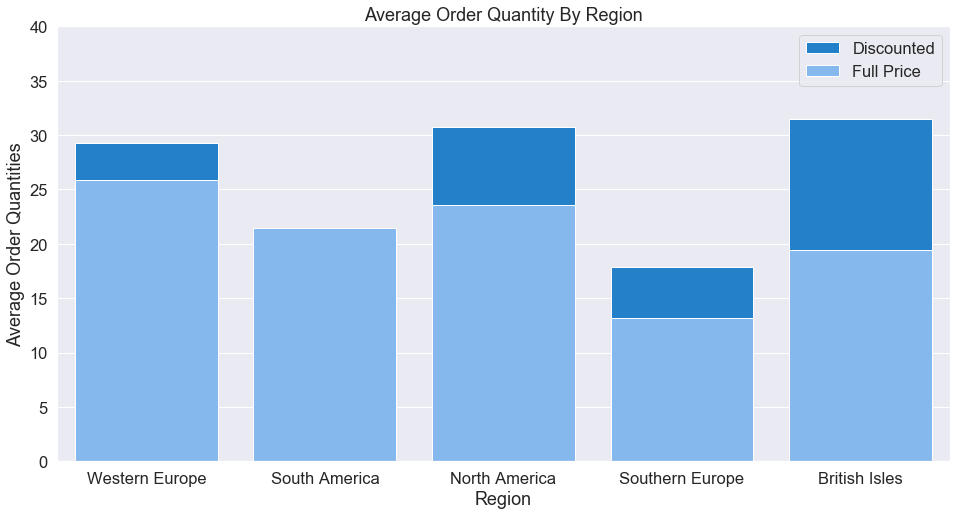

In [116]:
fig, ax = plt.subplots(figsize=(16,8))
# sns.set(font_scale=1.5)
sns.barplot(x=sample_regions_df.Region, y=sample_regions_df.MeanDiscount, color="#0984e3", label="Discounted")
sns.barplot(x=sample_regions_df.Region, y=sample_regions_df.MeanUndiscounted, color="#74b9ff", label="Full Price")
ax.set_title("Average Order Quantity By Region")
ax.set_ylim(0, 40)
plt.ylabel("Average Order Quantities")
plt.legend()

In [119]:
sample_cats_data = []
for cat in sample_cats:
    name = cat["CategoryName"]
    mean_discount = np.mean(cat["discounted_sample"])
    mean_ndiscount = np.mean(cat["undiscounted_sample"])
    mean_roc = mean_discount - mean_ndiscount
    ha = {"Category": name, "MeanDiscount": mean_discount, "MeanUndiscounted": mean_ndiscount, "MeanROC": mean_roc}
    sample_cats_data.append(ha)

sample_cats_df = pd.DataFrame(sample_cats_data)

In [120]:
sample_cats_df.MeanDiscount = sample_cats_df.MeanDiscount.astype('float64')
sample_cats_df.MeanUndiscounted = sample_cats_df.MeanUndiscounted.astype('float64')
sample_cats_df.MeanROC = sample_cats_df.MeanROC.astype('float64')

In [122]:
sample_cats_df.head()

,Category,MeanDiscount,MeanROC,MeanUndiscounted
0,Beverages,27.725067,6.907333,20.817733
1,Condiments,29.544867,8.289333,21.255533
2,Confections,24.439667,1.431000,23.008667
3,Dairy,29.313000,7.120267,22.192733
4,Grains/Cereals,24.541133,1.869400,22.671733


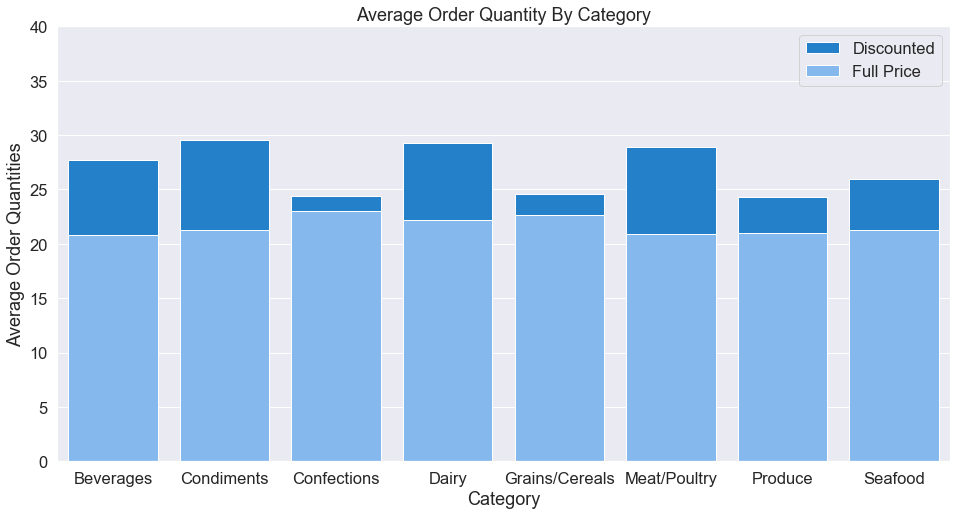

In [124]:
fig, ax = plt.subplots(figsize=(16,8))
# sns.set(font_scale=1.5)
sns.barplot(x=sample_cats_df.Category, y=sample_cats_df.MeanDiscount, color="#0984e3", label="Discounted")
sns.barplot(x=sample_cats_df.Category, y=sample_cats_df.MeanUndiscounted, color="#74b9ff", label="Full Price")
ax.set_title("Average Order Quantity By Category")
ax.set_ylim(0, 40)
plt.ylabel("Average Order Quantities")
plt.legend()